# Lab 3 | 20220808 | Perceptrons

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import datasets

## The Iris Dataset
### Pre-Processing
- loading the iris dataset
    - the features are loaded in X
    - all the class labels are loaded in y

In [2]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]] # take only the 3rd and 4th (index 2 and 3) features
# X = iris.data[:, :] # take all features
y = iris.target

In [3]:
print(X)
print(y)

[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]
 [1.4 0.3]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]
 [1.5 0.2]
 [1.6 0.2]
 [1.4 0.1]
 [1.1 0.1]
 [1.2 0.2]
 [1.5 0.4]
 [1.3 0.4]
 [1.4 0.3]
 [1.7 0.3]
 [1.5 0.3]
 [1.7 0.2]
 [1.5 0.4]
 [1.  0.2]
 [1.7 0.5]
 [1.9 0.2]
 [1.6 0.2]
 [1.6 0.4]
 [1.5 0.2]
 [1.4 0.2]
 [1.6 0.2]
 [1.6 0.2]
 [1.5 0.4]
 [1.5 0.1]
 [1.4 0.2]
 [1.5 0.2]
 [1.2 0.2]
 [1.3 0.2]
 [1.4 0.1]
 [1.3 0.2]
 [1.5 0.2]
 [1.3 0.3]
 [1.3 0.3]
 [1.3 0.2]
 [1.6 0.6]
 [1.9 0.4]
 [1.4 0.3]
 [1.6 0.2]
 [1.4 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [4.7 1.4]
 [4.5 1.5]
 [4.9 1.5]
 [4.  1.3]
 [4.6 1.5]
 [4.5 1.3]
 [4.7 1.6]
 [3.3 1. ]
 [4.6 1.3]
 [3.9 1.4]
 [3.5 1. ]
 [4.2 1.5]
 [4.  1. ]
 [4.7 1.4]
 [3.6 1.3]
 [4.4 1.4]
 [4.5 1.5]
 [4.1 1. ]
 [4.5 1.5]
 [3.9 1.1]
 [4.8 1.8]
 [4.  1.3]
 [4.9 1.5]
 [4.7 1.2]
 [4.3 1.3]
 [4.4 1.4]
 [4.8 1.4]
 [5.  1.7]
 [4.5 1.5]
 [3.5 1. ]
 [3.8 1.1]
 [3.7 1. ]
 [3.9 1.2]
 [5.1 1.6]
 [4.5 1.5]
 [4.5 1.6]
 [4.7 1.5]
 [4.4 1.3]
 [4.1 1.3]
 [4.  1.3]
 [4.4 1.2]

- We have 3 class labels
    - 0: setosa
    - 1: versicolor
    - 2: ?

In [4]:
print('Class Labels:', np.unique(y))

Class Labels: [0 1 2]


- We separate the data into 70% training and 30% testing data

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=1,
    stratify=y
)


In [6]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[1.4 0.2]
 [1.7 0.2]
 [5.3 2.3]
 [5.7 2.1]
 [1.2 0.2]
 [5.6 2.4]
 [6.6 2.1]
 [1.2 0.2]
 [5.8 1.6]
 [4.6 1.3]
 [3.3 1. ]
 [3.9 1.4]
 [1.3 0.2]
 [4.7 1.2]
 [4.  1.3]
 [5.1 1.9]
 [1.9 0.2]
 [3.5 1. ]
 [3.9 1.2]
 [1.6 0.2]
 [4.8 1.8]
 [6.9 2.3]
 [4.5 1.5]
 [4.5 1.3]
 [3.8 1.1]
 [5.6 2.4]
 [4.7 1.4]
 [5.6 1.4]
 [5.8 2.2]
 [5.1 2.4]
 [4.1 1.3]
 [1.5 0.4]
 [6.7 2.2]
 [5.  1.9]
 [4.8 1.8]
 [5.6 2.1]
 [4.2 1.5]
 [6.7 2. ]
 [5.5 1.8]
 [1.6 0.2]
 [4.9 1.8]
 [1.4 0.2]
 [5.1 1.5]
 [1.9 0.4]
 [1.  0.2]
 [4.9 1.5]
 [1.5 0.2]
 [1.1 0.1]
 [5.5 1.8]
 [4.7 1.5]
 [1.7 0.3]
 [3.5 1. ]
 [4.1 1. ]
 [1.5 0.2]
 [1.5 0.2]
 [1.5 0.2]
 [3.7 1. ]
 [6.1 2.5]
 [1.3 0.3]
 [4.9 1.5]
 [1.3 0.2]
 [4.5 1.6]
 [6.  1.8]
 [1.6 0.2]
 [1.4 0.2]
 [4.4 1.2]
 [5.1 1.9]
 [3.6 1.3]
 [4.1 1.3]
 [4.8 1.8]
 [6.1 2.3]
 [4.5 1.5]
 [4.5 1.5]
 [5.4 2.1]
 [5.6 2.2]
 [4.6 1.4]
 [1.5 0.4]
 [1.7 0.5]
 [6.1 1.9]
 [5.1 1.6]
 [6.4 2. ]
 [5.  1.5]
 [1.5 0.2]
 [4.2 1.3]
 [5.1 2. ]
 [6.  2.5]
 [1.5 0.3]
 [1.4 0.2]
 [5.6 1.8]
 [1.4 0.3]
 [5.9 2.3]

In [7]:
print('y:', np.bincount(y))
print('y_train:', np.bincount(y_train))
print('y_test:', np.bincount(y_test))

y: [50 50 50]
y_train: [35 35 35]
y_test: [15 15 15]


- standardizing the dataset

In [8]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train) # getting the mean and std variance for later
X_train_std = sc.transform(X_train) # transforming the data based on the mean and variance
X_test_std = sc.transform(X_test)

Text(0.5, 1.0, 'Classes Before and After Standardization')

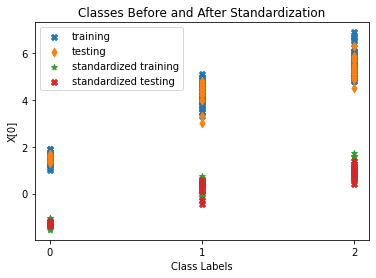

In [9]:
fig, ax = plt.subplots()
feautre_to_select = 0
ax.scatter(y_train, X_train[:, feautre_to_select], label="training", marker='X')
ax.scatter(y_test, X_test[:, feautre_to_select], label="testing", marker='d')
ax.scatter(y_train, X_train_std[:, feautre_to_select], label= "standardized training", marker='*')
ax.scatter(y_test, X_test_std[:, feautre_to_select], label="standardized testing", marker='X')

ax.legend()
ax.set_xticks([0, 1, 2])
ax.set_xlabel('Class Labels')
ax.set_ylabel('X[0]')
ax.set_title('Classes Before and After Standardization')

### Training

In [10]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

- Our model is now ready, in the `ppn` variable

### Testing

In [11]:
y_pred = ppn.predict(X_test_std) # get predicitions
print(f'Misclassified examples: {(y_test != y_pred).sum()}')

Misclassified examples: 1


In [12]:
from sklearn.metrics import accuracy_score

print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.978


## The KDD Cup Dataset

In [13]:
df = pd.read_csv('KDD_Train.csv')
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
125969,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [15]:
import category_encoders as ce
enc = ce.OrdinalEncoder(
    cols=['protocol_type', 'service', 'flag', 'class']
)
df_enc = enc.fit_transform(df)
df_enc

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,1,1,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,2,1,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,3,2,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,2
3,0,1,4,1,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,4,1,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,1,3,2,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,2
125969,8,2,3,1,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,1
125970,0,1,16,1,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,1
125971,0,1,36,2,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,2


In [16]:
X = df_enc.iloc[:, 0:41]
y = df_enc['class']

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [18]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train) # getting the mean and std variance for later
X_train_std = sc.transform(X_train) # transforming the data based on the mean and variance
X_test_std = sc.transform(X_test)

In [19]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [20]:
y_pred = ppn.predict(X_test_std) # get predicitions
print(f'Misclassified examples: {(y_test != y_pred).sum()}')

Misclassified examples: 2531


In [21]:
from sklearn.metrics import accuracy_score

print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.933
